In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
plt.style.use("ggplot")

# Basic bread and butter imports

In [25]:
import numpy as np
#np.random.seed(13)
import random 
import pandas as pd

In [4]:
from keras import backend as K
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Activation, Convolution2D, MaxPooling2D, Flatten, Conv2D
from keras.utils import np_utils
from keras.preprocessing import sequence

from keras import callbacks as keras_callbacks

Using TensorFlow backend.


# Lets load the data first 

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print X_train.shape
print y_train.shape

print X_test.shape
print y_test.shape

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## let us vizualize what it is

In [6]:
random_indexes = random.sample(range(0, X_train.shape[0]), 5)

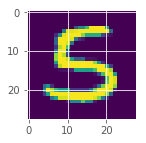

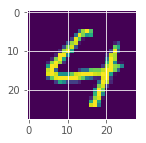

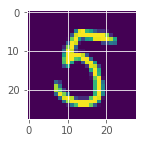

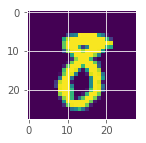

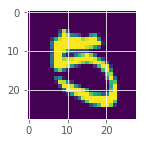

In [7]:

for i in random_indexes:
    plt.figure(figsize=(2,2))
    plt.imshow(X_train[i])
    plt.show()

# Utility functions

In [8]:
# visualization

def draw_digit(data, row, col, n):
    plt.subplot(row, col, n)    
    plt.imshow(data)
    plt.gray()

# basic Initalizations

In [9]:
img_rows, img_cols = 28, 28
nb_classes = 10

nb_filters = 5 # the number of filters
nb_pool = 2 # window size of pooling
nb_conv = 3 # window size of filter

# Preprocess the data

In [10]:
#X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols) 
#X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)

X_train = X_train.reshape(X_train.shape[0], img_cols, img_rows, 1)
X_test = X_test.reshape(X_test.shape[0], img_cols, img_rows, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#convert to grayscale
X_train /= 255 
X_test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


('X_train shape:', (60000, 28, 28, 1))
(60000, 'train samples')
(10000, 'test samples')


# Network 

In [11]:
epochs = 3

model = Sequential()
model.add(Conv2D(nb_filters, (nb_conv, nb_conv), input_shape=(img_cols, img_rows, 1)))
model.add(Activation('relu'))
#model.add(Convolution2D(nb_filters, nb_conv, nb_conv))

model.add(Conv2D(nb_filters, (nb_conv, nb_conv)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

### # Lets try to utilize tensorboard to visualize stuff - to do so we leverage callbacks

In [12]:
# model is looged at ./Graph

tb_CallBack = keras_callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)

# Lets see the network architecture

There are various ways to do this:

    tensor board
    keras ways 

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 5)         50        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 5)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 5)         230       
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 5)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 5)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 720)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               92288     
__________

In [13]:
from IPython.display import SVG
from matplotlib import pyplot as plt
plt.style.use("ggplot")

from keras.utils.vis_utils import model_to_dot


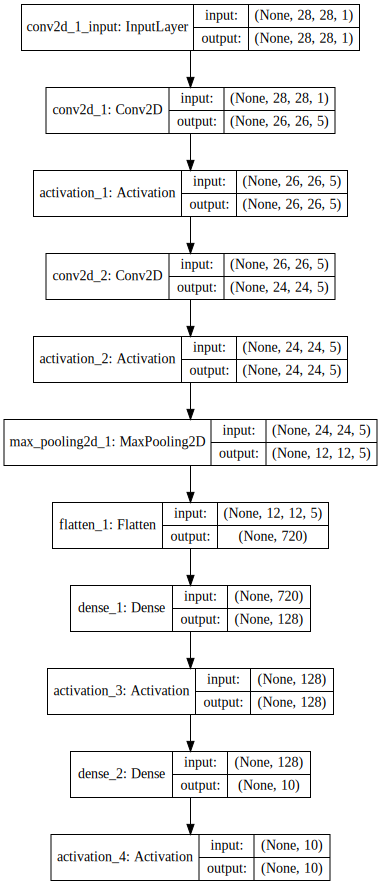

In [14]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

# Compile and train the model

In [15]:
model.compile(loss='categorical_crossentropy', optimizer="adadelta", metrics=['accuracy'])


history = model.fit(X_train, Y_train, epochs=epochs, batch_size=256, verbose=2,  
                    validation_split=0.2, callbacks=[tb_CallBack])

Train on 48000 samples, validate on 12000 samples
Epoch 1/3
12s - loss: 0.5595 - acc: 0.8399 - val_loss: 0.2032 - val_acc: 0.9385
Epoch 2/3
12s - loss: 0.1769 - acc: 0.9475 - val_loss: 0.1453 - val_acc: 0.9567
Epoch 3/3
12s - loss: 0.1265 - acc: 0.9629 - val_loss: 0.1233 - val_acc: 0.9627


# Visualize training, test - accuracies and loss 

- We can either do this via tensorboard
    + Open terminal
    + Get complete path to ./Graph
    + Run "tensorboard --logdir=<Complete path to ./Graph>"
    
- Or do it crudely 
    + Crude method is given below
    

In [16]:
# let see training and test accuracies

['acc', 'loss', 'val_acc', 'val_loss']


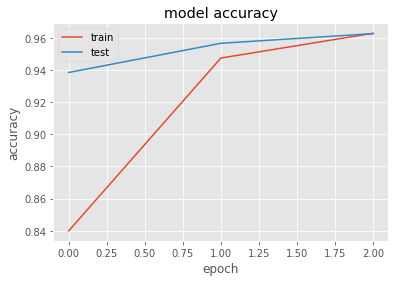

In [17]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.ylim([0.9,1.0])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
# let see training and test loss

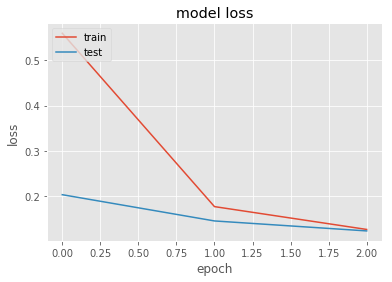

In [19]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Run the model on test set
    Get cumilative accuracy score
    Get predictions on every data point in test set

In [22]:
score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])

 9984/10000 [============================>.] - ETA: 0s()
('Test accuracy: ', 0.9651)


In [27]:
predictions = model.predict_classes(X_test)

predictions = list(predictions)
actuals = list(y_test)

sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
sub

 9760/10000 [============================>.] - ETA: 0s

,Actual,Predictions
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,6
9,9,9


In [ ]:
#lets Decipher the model

In [ ]:
show_size = 1

#plt.figure(figsize=(20,20))
plt.figure(figsize=(4,4))

for i in range(show_size):
    draw_digit(X_train[i].reshape(28,28), 1, show_size, i+1)
    
plt.show()

In [ ]:
get_first_layer_output = K.function([model.layers[0].input],[model.layers[1].output])

first_layer = get_first_layer_output([X_train[0:show_size]])[0]

In [ ]:
show_size = 1

get_first_layer_output = K.function([model.layers[0].input],
                                  [model.layers[1].output])

first_layer = get_first_layer_output([X_train[0:show_size]])[0]

first_layer.shape

In [ ]:
for img_index, filters in enumerate(first_layer, start=1):
    print img_index, filters.shape
    map1 = filters[:,:,0]
    map2 = filters[:,:,1]
    map3 = filters[:,:,2]

In [ ]:
print model.layers[0].input
print [model.layers[1].output]

print model.layers[1].input
print [model.layers[2].output]

In [ ]:
rand_layer =  get_first_layer_output([X_train[0:2]])[0]

rand_layer.shape

In [ ]:
first_layer.shape

In [ ]:
show_size = 1

plt.figure(figsize=(20,20))

for img_index, filters in enumerate(first_layer, start=1):
    for filter_index, mat in enumerate(filters):
        pos = (filter_index)*10 + (img_index)
        draw_digit(mat, nb_filters, show_size, pos)

plt.show()

In [ ]:
for img_index, filters in enumerate(first_layer, start=1):
    print "img_index=%s, filters.shape=%s" %(img_index, filters.shape)
    for filter_index, mat in enumerate(filters):
        print "filter_index=%s" %filter_index
        pos = (filter_index)*1 + (img_index)
        print "pos=%s" %pos
        #pos = pos - 1
        #print "pos=%s" %pos
        if pos < 51:
            draw_digit(mat, nb_filters, show_size, pos)

In [ ]:
for img_index, filters in enumerate(first_layer, start=1):
    print img_index, filters.shape

In [ ]:
#for img_index, filters in enumerate(first_layer, start=1):
#    print img_index, filters.shape
    
filters = (26, 26, 5)

for filter_index, mat in enumerate(filters):
    print filter_index

In [ ]:
for img_index, filters in enumerate(first_layer, start=1):
    print "img_index=%s, filters.shape=%s" %(img_index, filters.shape)
    for filter_index, mat in enumerate(filters):
        print "filter_index=%s" %filter_index
        #print "mat_shape = %s" %(mat.shape)
        #pos = (filter_index)*1 + (img_index)
        #print "pos=%s" %pos

In [ ]:
type(mat)

In [ ]:
mat.shape

In [ ]:
filters.shape

In [ ]:
for img_index, filters in enumerate(first_layer, start=1):
    print "img_index=%s, filters.shape=%s" %(img_index, filters.shape)
    for filter_index, mat in enumerate(filters):
        print "filter_index=%s" %filter_index
        print type(mat)
        print mat.shape
        #print "mat_shape = %s" %(mat.shape)
        #pos = (filter_index)*1 + (img_index)
        #print "pos=%s" %pos

In [ ]:
fil1 = filters.reshape()